<a href="https://colab.research.google.com/github/UlviDemirsoy/finetuning-embeddings-word2vec/blob/main/NeuralNetworkProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#abdüllatif köksalın embeddingleri
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import torch
import torch.optim as optim
import torch.nn as nn
from IPython import display


from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/trmodel', binary=True)
type(word_vectors)


gensim.models.keyedvectors.KeyedVectors

In [ ]:
indexedwords=word_vectors.index_to_key
#print(words)

vectors_array = np.zeros((len(word_vectors), word_vectors.vector_size))
for i, word in enumerate(word_vectors.index_to_key):
   # print(word, word_vectors[word])
    vectors_array[i] = word_vectors[word]

# Now vectors_array contains the vectors for each word
print(len(vectors_array))



412457


In [ ]:
#AutoEncoder

In [ ]:
print(type(vectors_array))
vectors_array.shape

<class 'numpy.ndarray'>


(412457, 400)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


x_train_tensor = torch.from_numpy(vectors_array).float()
y_train_tensor = torch.from_numpy(vectors_array).float()

learning_rate = 1e-2 # alpha


class AE(nn.Module):
  def __init__(self, n_features, n_hidden):
    super(AE, self).__init__()
    self.fc1 = nn.Linear(n_features, n_hidden)
    self.fc2 = nn.Linear(n_hidden, n_features)

  def encode(self, x):
    return self.fc1(x)

  def decode(self, x):
    return self.fc2(x)

  def forward(self, x):
    h = self.encode(x)
    return self.decode(h)

ae = AE(400, 40)


criterion = nn.MSELoss() # (x-y)^2
optimizer = torch.optim.Adam(ae.parameters(),
                             lr=learning_rate)
n_epoch = 200
losses = []
for t in range(n_epoch):

    # Feed forward to get the logits
    # y_pred = model_compress(x_train_tensor)
    y_pred = ae(x_train_tensor)

    # Compute the loss
    loss = criterion(y_pred, y_train_tensor)
    # Dont accumulate previous gradients
    optimizer.zero_grad()

    print(f"[EPOCH]: {t}/{n_epoch}, [LOSS]: {loss.item():.6f}")
    display.clear_output(wait=True)
    losses.append(loss.item())

    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params.
    loss.backward()

    # Update params with some gradient-based method
    optimizer.step()

[EPOCH]: 199/200, [LOSS]: 0.019478


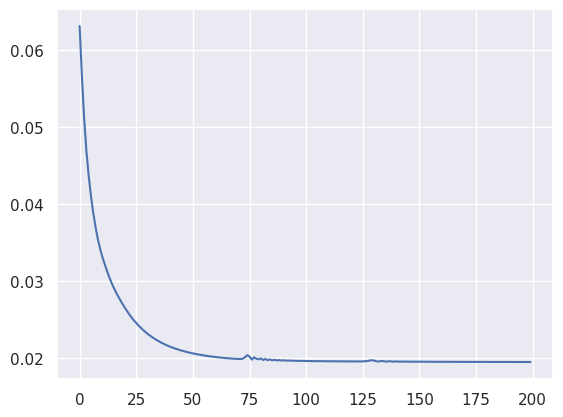

In [ ]:
plt.plot(losses)

In [ ]:
torch.save(ae, '/content/drive/MyDrive/autoencodermodel.pt')

In [ ]:
model = torch.load('/content/drive/MyDrive/autoencodermodel.pt')

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7f1c26637d10>

In [ ]:
#get encoded low dimension embeddings
lowerdimensionembeddings = model.encode(x_train_tensor)
print(lowerdimensionembeddings.shape)



# print(word_vectors.similarity('galatasaray','spor'))
# result = word_vectors.similar_by_word("futbol")
# print(result)

torch.Size([412457, 40])


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#new dataset for finetuning

corpus = '''Galatasaray futbol takımı, Galatasaray Spor Kulübü'nün Süper Lig'de mücadele eden futbol takımıdır. Galatasaray Spor Kulübü'ne ait olan Galatasaray Sportif Anonim Şirketi, kulübün futbol takımının sahibidir. Galatasaray Spor Kulübü'nün 1997 yılında şirketleşme sürecine girmesinin ardından kurulmuştur. Hisselerinin %55,03'lük kısmı Galatasaray Spor Kulübü Derneğine aittir, %44,97'lik kısmı Borsa İstanbul'da halka açıktır. Türkiye futbol tarihinin başarılı ve en çok taraftarı olan spor kulüplerinden birisidir.

1905 yılında Ali Sami Yen ve arkadaşları tarafından, öğrenci oldukları Galatasaray Lisesi'nde kurulan kulübün ilk spor dalıdır. Galatasaray
 Spor Kulübünü Kuruluş gayesi Türk olmayan takımları yenmek olarak açıklanmıştır. Şu ana kadar 23 kez Süper Lig şampiyonu olmuş, 18 kez
 Türkiye Kupası ve 16 kez de Türkiye Süper Kupası kazanmış; 2000 yılında da UEFA Kupası'nı ve UEFA Süper Kupa'yı kazanmıştır. Galatasaray
  Spor Kulübü, ayrıca Uluslararası Futbol Tarihi ve İstatistikleri Federasyonu tarafından yapılan "Dünyanın en iyi futbol kulüpleri"
   istatistik çalışmasında, 2000 Ağustos ayı en iyi takımı 2001 Ocak ayında ise puan sıralamasında 1. sıraya yükselerek ayın lideri
    olmuştur. Galatasaray Spor Kulübü 1999-00 sezonunda UEFA Şampiyonlar Ligi gruplarını 3. olarak bitirdikten sonra, katıldığı
     UEFA Kupası'nı yenilmeden kazanan tek takımdır. 1999-2000 yılında, UEFA Kupası finalinde İngiltere'nin Arsenal kulübünü
      penaltılarda 4-1 yenerek, bir Avrupa Kupası kazanan ilk ve tek Türk futbol kulübü olmuştur. Galatasaray Spor Kulübü aynı
       yıl; Süper Kupa'yı da Real Madrid'i 2-1 yenerek kazanmıştır Galatasaray futbol Galatasaray futbol
        futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
         futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
          futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
           futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
            futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
             futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
              futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
               futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
                futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
                 futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray
                  futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol
          Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol Galatasaray futbol .
          '''

import string
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, '')
    return text.strip()

new_corpus = remove_punctuation(corpus,regular_punct)
#print(new_corpus)

from nltk.stem import PorterStemmer
ps=PorterStemmer()
words = word_tokenize(new_corpus.lower())

# stemmed_corpus = ""
# for word in words:
#     stemmed_corpus = stemmed_corpus + ps.stem(word) + " "
#     #print(word + ":" + ps.stem(word))

# stemmed_corpus = stemmed_corpus.lower()

from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
#print(words)
wordsFiltered = []
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)




numerics_removed_words = []
for w in words:
    if not w.isnumeric():
        numerics_removed_words.append(w)

print(numerics_removed_words)
#corpusta yeni eklenen kelimeleri tespit et random embedding oluştur arraya append et key value ayrı arraylere

['galatasaray', 'futbol', 'takımı', 'galatasaray', 'spor', 'kulübünün', 'süper', 'ligde', 'mücadele', 'eden', 'futbol', 'takımıdır', 'galatasaray', 'spor', 'kulübüne', 'ait', 'olan', 'galatasaray', 'sportif', 'anonim', 'şirketi', 'kulübün', 'futbol', 'takımının', 'sahibidir', 'galatasaray', 'spor', 'kulübünün', 'yılında', 'şirketleşme', 'sürecine', 'girmesinin', 'ardından', 'kurulmuştur', 'hisselerinin', '5503lük', 'kısmı', 'galatasaray', 'spor', 'kulübü', 'derneğine', 'aittir', '4497lik', 'kısmı', 'borsa', 'i̇stanbulda', 'halka', 'açıktır', 'türkiye', 'futbol', 'tarihinin', 'başarılı', 've', 'en', 'çok', 'taraftarı', 'olan', 'spor', 'kulüplerinden', 'birisidir', 'yılında', 'ali', 'sami', 'yen', 've', 'arkadaşları', 'tarafından', 'öğrenci', 'oldukları', 'galatasaray', 'lisesinde', 'kurulan', 'kulübün', 'ilk', 'spor', 'dalıdır', 'galatasaray', 'spor', 'kulübünü', 'kuruluş', 'gayesi', 'türk', 'olmayan', 'takımları', 'yenmek', 'olarak', 'açıklanmıştır', 'şu', 'ana', 'kadar', 'kez', 'süper

In [ ]:
#yeni gelen kelimeleri bulup random vector initialize edilir

setindextedword = set(indexedwords)
new_words = set(numerics_removed_words)
difference = list(new_words.difference(setindextedword))
print(difference)


['4497lik', 'i̇stanbulda', 'madridi', 'i̇ngilterenin', '5503lük', 'i̇statistikleri']


In [ ]:
#randomly initialize new embeddings for new words


copystore = np.copy(lowerdimensionembeddings.detach().numpy())
for w in difference:
  print(w)
  indexedwords.append(w)
  copystore = np.vstack([copystore, np.random.rand(40)])#en doğru initialization yöntemi
 # lowerdimensionembeddings = np.concatenate((lowerdimensionembeddings, np.random.rand(40)), axis=0)


copystore[412462]



4497lik
i̇stanbulda
madridi
i̇ngilterenin
5503lük
i̇statistikleri


array([0.10800785, 0.47826685, 0.48532438, 0.29004201, 0.10715211,
       0.223528  , 0.30225163, 0.04643839, 0.41209646, 0.77632285,
       0.9037397 , 0.89955342, 0.84708149, 0.34862506, 0.90797162,
       0.06958937, 0.81923525, 0.34760181, 0.62047718, 0.79685833,
       0.75069678, 0.21825493, 0.4097274 , 0.548055  , 0.0610445 ,
       0.73383837, 0.08526042, 0.95079978, 0.76346766, 0.9818737 ,
       0.45666618, 0.67875958, 0.51458394, 0.31110129, 0.57292259,
       0.45620445, 0.58531737, 0.60978287, 0.27718862, 0.21716844])

In [ ]:
len(indexedwords)
len(copystore)

412463

In [ ]:
#fine tune embeddings with new dataset

import pandas as pd

id2tok = dict(enumerate(indexedwords))
tok2id = {token: id for id, token in id2tok.items()}

print(type(tok2id))
#print(tok2id)


data = {'input1': [], 'input2': [], 'output': []}

reverse_data = {'input1': [], 'input2': [], 'output': []}
numerics_removed_words

for i in range(len(numerics_removed_words)-1):
  data['input1'].append(numerics_removed_words[i])
  data['input2'].append(numerics_removed_words[i+1])
  data['output'].append(1)


for i in range(len(numerics_removed_words)-1,1,-1):
  reverse_data['input1'].append(numerics_removed_words[i])
  reverse_data['input2'].append(numerics_removed_words[i-1])
  reverse_data['output'].append(1)

#print("validen",data[:,:-1])
df_data = pd.DataFrame(data)
#df_data
df_reverse = pd.DataFrame(reverse_data)
#df_reverse
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

print("tok2idget",tok2id.get)
class data_set(Dataset):
  def __init__(self, data):
    self.X = np.vectorize(tok2id.get)(data[:,:-1])
    self.y = data[:,-1]
  def __len__(self):
    return len(self.X)
  def getx(self):
    return self.X
  def __getitem__(self, index):
    return self.X[index], self.y[index]


dataset = data_set(pd.concat([df_data, df_reverse], ignore_index=True).values)




<class 'dict'>
tok2idget <built-in method get of dict object at 0x7f1c1e046140>


In [ ]:
class Word2Vec2(nn.Module):
  def __init__(self):
    super().__init__()
    self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(copystore))
    self.embedding.requires_grad = False

  def forward(self, X_batch):
    U = self.embedding(X_batch[:,0])
    V = self.embedding(X_batch[:,1])

    output = torch.sigmoid(torch.sum(torch.mul(U, V), 1))
    return output



In [ ]:
len(torch.FloatTensor(copystore))

412463

In [ ]:
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

for i, (batch_X, batch_y) in enumerate(dataloader):
  print(i, batch_X[:,0],batch_X[:,1], batch_y)
  if i >= 2:
    break

0 tensor([  453,    25,   543,   223,  1822,   453,   453,    91,   453,    91,
           12,   453,   133, 11369,   453,   453]) tensor([  91,  133, 2219,   11,  465,   91,   91,  453,   91,  453,  689,   91,
          25,   11,   91,   91]) tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
1 tensor([   10,    91,   453,   453,   770,   279,    91,  7613,    91,    91,
           91,   453, 72732,   453,    91,    61]) tensor([ 327,  453,   91,  124,  453,   22,  453, 3782,  453,  453,  453,   91,
         849,   91,  453,  849]) tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
2 tensor([   11,   351, 11369,   453,   453,  2219,  2715,   543,   453,    91,
          184,   171,    91, 12790,   453,  1948]) tensor([   536,    453,    374,     91,     91,     91,  33287,      0,     91,
           453,     42,    453,    453,   4363,     91, 412458]) tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [ ]:
type(torch.FloatTensor(vectors_array))

torch.Tensor

In [ ]:
from itertools import chain
from collections import Counter

dim_size = 40
embed_size = 5

model = Word2Vec2()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

LR = 1e-1
EPOCHS = 1500
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

from tqdm import tqdm # For progress bars
from IPython import display

running_loss = []
for epoch in tqdm(range(EPOCHS)):
  epoch_loss = 0
  for i, (batch_X, batch_y) in enumerate(dataloader):
    optimizer.zero_grad()
    # X_batch is (i,j) index must be int
    X_batch = batch_X.type(torch.int).to(device)
    # y_batch must be float
    y_batch = batch_y.type(torch.float32).to(device)
    y_pred = model(X_batch)

    loss = loss_fn(y_pred, y_batch)
    epoch_loss += loss.item()
    loss.requires_grad = True
    loss.backward()
    optimizer.step()
  epoch_loss /= len(dataloader)
  running_loss.append(epoch_loss)
  print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss:.4f}')
  display.clear_output(wait=True)

100%|██████████| 1500/1500 [01:18<00:00, 19.09it/s]


In [ ]:
testembedding = model.embedding(torch.tensor((tok2id.get('galatasaray')), device="cpu"))
testembedding2 = model.embedding(torch.tensor((tok2id.get('spor')), device="cpu"))
print(type(testembedding2))
cosi = torch.nn.CosineSimilarity(dim=0)
output = cosi(testembedding, testembedding2)
print("Cosine Similarity of new embeddings",output )

oldembedding = (torch.tensor(word_vectors['galatasaray'], device="cpu"))
oldembedding2 = (torch.tensor(word_vectors['spor'], device="cpu"))
output2 = cosi(oldembedding, oldembedding2)
print("Cosine Similarity of Köksal's embeddings",output2 )



<class 'torch.Tensor'>
Cosine Similarity of new embeddings tensor(0.7545)
Cosine Similarity of Köksal's embeddings tensor(0.3466)
